Ex 1 (4 pts). Logistic Regression (by hand)
--

Suppose we have the following normalized dataset

$$
\begin{array}{lllr}
GPA	&GRE	&Dummy	&y \\ \hline
1	&1	&1	&1 \\
0.9	&1	&1	&1 \\
0.9	&0.875	&1	&1 \\
0.7	&0.75	&1	&-1 \\
0.6	&0.875	&1	&-1 \\
\end{array}
$$			
			
and want to construct a Logistic Regression classifier using Gradient Descent for Maximum Likelihood. If we start with an all zero weight vector, what will the weight vector be after the first iteration? (Consider kappa=2)
Show the details of your calculations. This is a pencil and paper exercise. See the posted Excel spreadsheet for an example. 


Ex 2 (10 pts). Logistic Regression - Gradient Descent
--
In this part you will build a logistic regression model using Numpy and doing gradient descent. 
You should complete the TODO parts in the following cells. 

In [96]:
import numpy as np
import matplotlib.pyplot as plt

In [97]:
# GPA, GRE scores dataset

X=np.array([
[1,1.0,1.0],
[1,0.9,1.0],
[1,0.9,0.875],
[1,0.7,0.75],
[1,0.6,0.875],
[1,0.6,0.875],
[1,0.5,0.75],
[1,0.5,0.8125],
[1,0.5,1.0],
[1,0.5,0.875],
[1,0.5,0.875]])

print(X)

y=np.array([[
1,
1,
1,
-1,
-1,
1,
-1,
-1,
1,
-1,
1
]]).T;

print(y)

[[1.     1.     1.    ]
 [1.     0.9    1.    ]
 [1.     0.9    0.875 ]
 [1.     0.7    0.75  ]
 [1.     0.6    0.875 ]
 [1.     0.6    0.875 ]
 [1.     0.5    0.75  ]
 [1.     0.5    0.8125]
 [1.     0.5    1.    ]
 [1.     0.5    0.875 ]
 [1.     0.5    0.875 ]]
[[ 1]
 [ 1]
 [ 1]
 [-1]
 [-1]
 [ 1]
 [-1]
 [-1]
 [ 1]
 [-1]
 [ 1]]


Create a $w$ array with dimension 1 and X.shape[1] initialized to all ones, i.e. [[1,1,...,1]].

Create a function to compute the loss (cost or error) function of logistic regression: 
$$
E(w) = \frac{1}{n} \sum_{k=1}^n \log(1+exp(-y^k*x^k @ w^T))
$$
where "@" is the matrix multiplication operator.
Do not use loops. Utilize Numpy matrix operations. 

**Hints.**

Create a function *error(x,y,w)* that returns $\log(1+exp(-y*x@w^T))$. Use *np.log* and *np.exp*.

Create a function *error_mean(X,y,w)* that calls *error(X,y,w)*. The latter returns an array of errors, one for each instance in X. Then sum these errors, and return the result divided by $n$. 

Do not hardcode $n$, but extract it from the shape of X. 

In [98]:
w = np.ones((1,X.shape[1]))

#TODO
def error(x,y,w):
    error = np.log(1 + np.exp(-y * x @ w.T))
    return error

#TODO
def error_mean(X,y,w):
    sum = np.sum(error(X,y,w), axis=0, keepdims=True)[0][0]
    error_mean = sum / X.shape[0]
    return error_mean

print(error_mean(X,y,w))

1.1564462905916348


Expected output: 

1.15644629059

Create a function to compute the gradient of the loss function at a point (given by w). 
Recall the the gradient function is:
$$
\nabla_E(w) = -\frac{1}{n} \sum_{k=1}^{n} \frac{y^k * x^k}{1+\exp(y^k*x^k@w^T)}
$$

**Hints.**

Create a function *grad(x,y,w)* that returns 
$$\frac{y * x}{1+\exp(y*x@w^T)}$$

Create a function *grad_mean(X,y,w)* that calls *grad(X,y,w)* and computes and returns $\nabla_E(w)$.

Do not use loops. Do not hard-code $n$.

In [99]:
#TODO
def grad(x,y,w):
    result = y * x / (1 + np.exp(y * x @ w.T))
    return result

#TODO
def grad_mean(X,y,w):
    sum = np.sum(-grad(X,y,w), axis=0, keepdims=True)[0]
    grad_mean = sum / X.shape[0]
    return grad_mean

print(grad_mean(X,y,w))

[0.37959402 0.20802755 0.30424018]


Expected output:
[ 0.37959402  0.20802755  0.30424018]

Implement the gradient descent algorithm for logistic regression. 

For this create a function *fit(X,y,kappa,iter)* starts with an all-zero array for $w$ and improves it using *iter* iterations. Record in a list E the value of the *error_mean(X,y,w)* after each iteration. Return w,E. 

Plotting list E should give a decreasing curve. 

[[-1.98019655  2.00560449  1.0649168 ]]


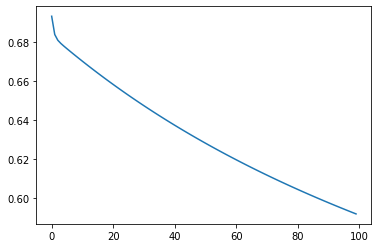

In [100]:
def fit(X,y,kappa,iter):
    w = np.zeros((1,X.shape[1]))
    E = []

    #TODO
    for i in range(iter):
        E.append(error_mean(X,y,w))
        w = w-kappa*grad_mean(X,y,w)
    
    return w,E

w,E = fit(X,y,1,100)
print(w)
plt.plot(E)
plt.show()

Expected output: 
[[-1.98019655  2.00560449  1.0649168 ]]

and a decreasing curve of errors. 

Ex 3 (10 pts). Logistic regression - Application
--
In the first part of this exercise, we'll build a logistic regression model to predict whether a student gets admitted to a university. Suppose that you are the administrator of a university department and you want to determine each applicant's chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant's scores on two exams and the admissions decision. To accomplish this, we're going to build a classification model that estimates the probability of admission based on the exam scores.

Let's start by examining the data.

In [101]:
import pandas as pd

data = pd.read_csv('ex3data1.txt', header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [102]:
# we use .values to obtain the underlying numpy array of the dataframe
# we use iloc in order to access parts of the dataframe by using ranges; -1 is the last column
X = data.iloc[:,0:-1].values

# we normalize X
maxX = np.max(X, axis=0)
minX = np.min(X, axis=0)
X = (X-minX)/(maxX-minX)
print( X )


# we insert an all-ones column at index 0
X = np.insert(X, 0, 1, axis=1)

print(X)

y = data.iloc[:,-1:].values 


# we build a boolean index
where_are_zeros = (y==0)
y[where_are_zeros] = -1

print(y)

# uncomment the above printouts to see what's going one

[[0.06542784 0.69465488]
 [0.00326632 0.19470455]
 [0.08296784 0.61961779]
 [0.43176427 0.81600135]
 [0.7019434  0.65539214]
 [0.2153456  0.37665959]
 [0.44500891 0.96545859]
 [0.64449684 0.23365526]
 [0.65989108 0.83229079]
 [0.77934283 0.18940757]
 [0.94315096 0.11165142]
 [0.64433793 0.        ]
 [0.74887421 0.67205614]
 [0.56336978 0.98314328]
 [0.13586997 0.6655353 ]
 [0.34273413 0.85846452]
 [0.55914951 0.32427783]
 [0.5430494  0.23547989]
 [0.58195856 0.91295399]
 [0.67250409 0.24862534]
 [0.53481039 0.17922749]
 [0.85450448 0.51557164]
 [0.29348214 0.26737325]
 [0.05952839 0.19931197]
 [0.68605319 0.56205138]
 [0.46169753 0.57643769]
 [0.71853306 0.20827835]
 [0.90377581 0.12008007]
 [0.45537943 0.28788555]
 [0.12508388 0.50379883]
 [0.44891644 0.61823627]
 [0.7932702  0.38743524]
 [0.3160307  0.47643451]
 [0.31513382 0.56879704]
 [0.14588236 0.59421062]
 [0.35225201 0.31656415]
 [0.05527778 1.        ]
 [0.48901588 0.73689201]
 [0.64112153 0.16069675]
 [0.05912103 0.65382979]


Now let's make the above into a function to use later

In [103]:
def prepare(data):
    X = data.iloc[:,0:-1].values

    # we normalize X
    maxX = np.max(X, axis=0)
    minX = np.min(X, axis=0)
    X = (X-minX)/(maxX-minX)

    # we insert an all-ones column at index 0
    X = np.insert(X, 0, 1, axis=1)

    y = data.iloc[:,-1:].values 

    where_are_zeros = (y==0)
    y[where_are_zeros] = -1
    
    return X,y


X,y = prepare(data)
#print(X)
#print(y)

Let's visualize X and y. We can create a function for that.

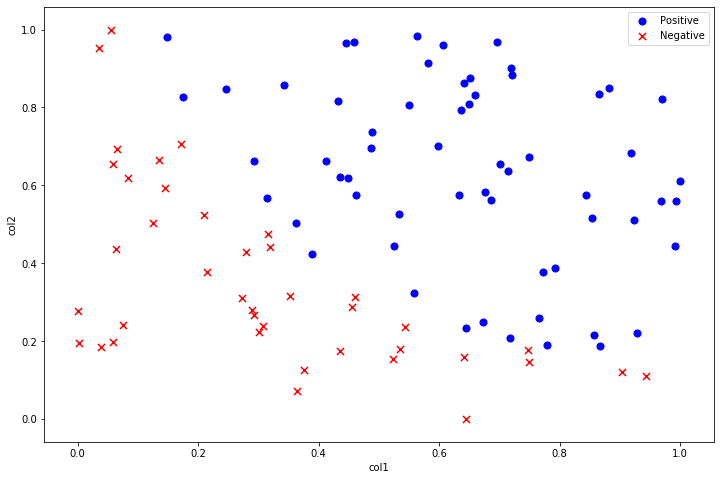

In [104]:
def visualize(X, y, col1=1, col2=2):
    positive_indexes = np.where(y == 1)[0]  #only the first element of the result is needed, i.e. we do [0]
    negative_indexes = np.where(y == -1)[0]

    positive = X[positive_indexes]  # positive rows
    negative = X[negative_indexes]  # negative rows

    fig, ax = plt.subplots(figsize=(12,8))
    ax.scatter(positive[:,1:2], positive[:,2:], s=50, c='b', marker='o', label='Positive')
    ax.scatter(negative[:,1:2], negative[:,2:], s=50, c='r', marker='x', label='Negative')
    ax.legend()
    ax.set_xlabel('col' + str(col1))
    ax.set_ylabel('col' + str(col2))

    plt.show()
    

visualize(X,y)

[[-8.18922472  9.35074421  8.77019163]]


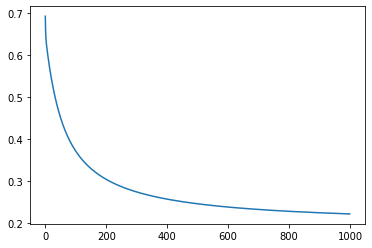

In [105]:
w,E = fit(X,y,1,1000)
print(w)
plt.plot(E)
plt.show()

# We should get a decreasing curve

Next we need to write a function that will output predictions for a dataset X using our learned parameters theta. We can then use this function to score the training accuracy of our classifier.

In [106]:
#TODO
def predict(w, X):
    re = []
    for x in X:
        if(1/(1+np.exp(-w[0].T@x))>0.5):
            re.append(1)
        else:
            re.append(-1)
    return re

#TODO
def accuracy(y,y_pred):
    count = 0
    for i in range(len(y)):
        if(y[i] == y_pred[i]):
            count+=1
            
    return count/len(y)

y_pred = predict(w,X)
print( accuracy(y,y_pred) )

0.89


Expected output: 0.89

In [107]:
def split_train_test(X,y,pct=80):
    n = X.shape[0]
    s = round(n * pct / 100)
    
    indices = np.random.permutation(n)
    train_idx, test_idx = indices[:s], indices[s:]
    
    X_train, X_test = X[train_idx,:], X[test_idx,:]
    y_train, y_test = y[train_idx,:], y[test_idx,:]
    
    return X_train, y_train, X_test, y_test

[[-8.33596378 10.18094945  8.10307699]]


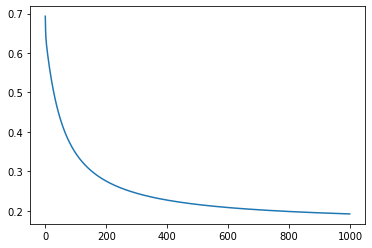

0.85


In [108]:
X_train, y_train, X_test, y_test = split_train_test(X,y,pct=80)
w,E = fit(X_train,y_train,1,1000)
print(w)
plt.plot(E)
plt.show()
y_pred = predict(w,X_test)
print( accuracy(y_test,y_pred) )

Expected output: 

[[-8.10599158  9.01450903  8.71087333]]

A decreasing curve. 

Accuracy: 0.95

Results may vary due to the randomized nature of the train/test split. 

Ex. 3 (10 pts). Linear Regression
--

Extend the linear regression algorithm for Python on the slides to:

1.	Read the data from a file (regdata.csv)
2.	Scale the attributes
3.	Compute the error at each iteration and save the error values in a list
4.	Plot the error list as a curve in the end
5.	Find a good learning rate based on the error curve.

**Hints.**
1. y in the slides of linear regression is a row matrix. So, when extracting it from the dataset be careful to turn it into a row matrix.
2. Do not forget to add the "dummy" attribute (all ones) to X. 
3. For this dataset the kappa should be quite small in order to have a decreasing E. 

[[47.38039898  8.00751244 37.42805933]]


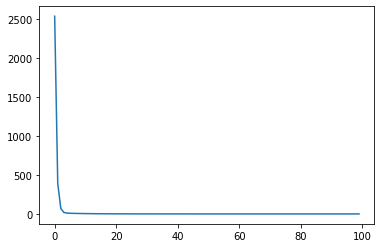

In [112]:
def linear_reg(X,y,kappa,iter):
    w = np.zeros((1,X.shape[1]))
    E = []

    #TODO
    for i in range(iter):
        E.append((1/(2*X.shape[0]))*(np.sum((y-X@w.T)**2)))
        w = w+kappa*1/X.shape[0]*(np.sum((y-X@w.T)*X,axis=0,keepdims =True))
    
    return w,E
            
data = pd.read_csv('regdata.csv', header=None, names=['x1', 'x2', 'y'])
#Referrence from the function "prepare" in the above cell
X = data.iloc[:,0:-1].values

# we normalize X
maxX = np.max(X, axis=0)
minX = np.min(X, axis=0)
X = (X-minX)/(maxX-minX)

# we insert an all-ones column at index 0
X = np.insert(X, 0, 1, axis=1)

y = data.iloc[:,-1:].values 

w,E = linear_reg(X,y,0.9,100)
print(w)
plt.plot(E)
plt.show()